## 简单散点图
 
另一种常用的图类型是简单散点图，线图的近亲。此处的点不是由线段连接，而是由点，圆或其他形状分别表示。首先，设置ipython notebook得作图环境：


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# 使用风格seaborn白底
plt.style.use('seaborn-whitegrid')
import numpy as np

### plt.plot制作散点图
在上一节中，我们查看了plt.plot / ax.plot以生成线图。事实证明，相同的函数也可以生成散点图：

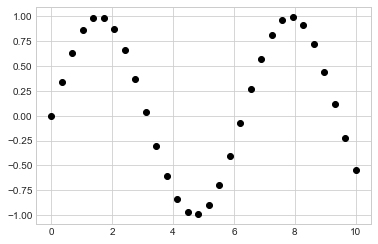

In [6]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

函数调用中的第三个参数是一个字符，代表用于绘图的符号类型。正如可以指定诸如“-”，“-”之类的选项来控制线条样式一样，标记样式也具有自己的一组短字符串代码。可用符号的完整列表可以在plt.plot文档或Matplotlib的在线文档中找到。大多数可能性都是相当直观的，我们将在此处显示一些更常见的可能性：

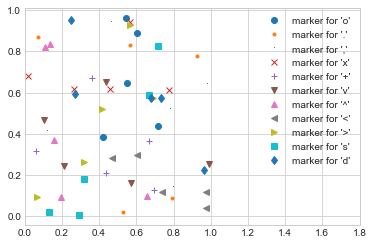

In [8]:
rng=np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5),rng.rand(5),marker,label="marker for '{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

为了获得更多的可能性，这些字符代码可以与线和颜色代码一起用于绘制点以及连接它们的线：

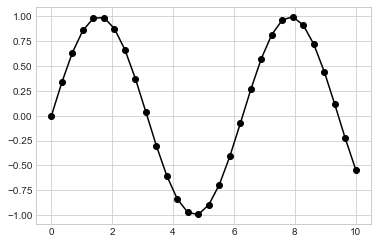

In [9]:
plt.plot(x, y, '-ok');

plt.plot的其他关键字参数指定线和标记的广泛属性：

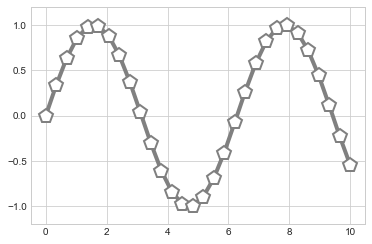

In [10]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

plt.plot函数中的这种灵活性允许使用多种可能的可视化选项。有关可用选项的完整说明，请参阅plt.plot文档。

### plt.scatter的散点图
第二种功能更强大的创建散点图的方法是plt.scatter函数，其用法与plt.plot函数非常相似：

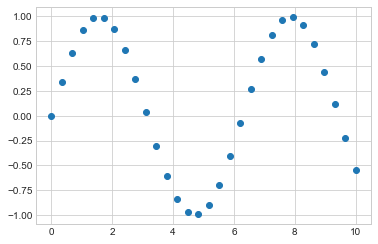

In [11]:
plt.scatter(x, y, marker='o');

 
plt.scatter与plt.plot的主要区别在于，它可以用于创建散点图，在散点图中可以单独控制每个点的属性（大小，面色，边缘颜色等）或将其映射到数据。

让我们通过创建具有许多颜色和大小的点的随机散点图来显示这一点。为了更好地查看重叠结果，我们还将使用alpha关键字来调整透明度级别：

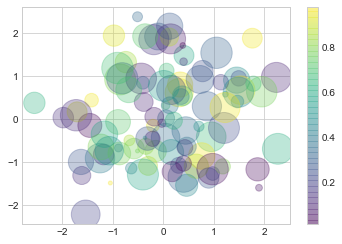

In [12]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
# 随机颜色
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
# 设置透明度
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale



 
请注意，color参数会自动映射到色标（此处由colorbar（）命令显示），并且size参数以像素为单位。这样，点的颜色和大小可用于在可视化中传达信息，以可视化多维数据。

例如，我们可以使用Scikit-Learn提供的Iris数据，其中的每个样本都是经过仔细测量其花瓣和萼片大小的三种类型的花朵之一：

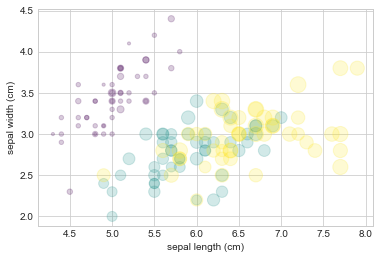

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

我们可以看到，散点图使我们能够同时探索数据的四个不同维度：每个点的（x，y）位置对应于萼片的长度和宽度，该点的大小与花瓣有关宽度，并且颜色与花的特定种类有关。这样的多色和多特征散点图可用于数据的探索和表示。

### 图与散点图：效率说明
 
除了plt.plot和plt.scatter中可用的不同功能之外，为什么还要选择使用其中一个呢？尽管对于少量数据并没有多大关系，但随着数据集变得超过几千个点，plt.plot可能比plt.scatter效率更高。原因是plt.scatter能够为每个点渲染不同的大小和/或颜色，因此渲染器必须完成单独构造每个点的额外工作。另一方面，在plt.plot中，这些点始终基本上是彼此的克隆，因此对于整个数据集，确定这些点的外观的工作仅进行一次。对于大型数据集，这两者之间的差异可能导致性能大不相同，因此，对于大型数据集，plt.plot应该优于plt.scatter。